In [3]:
%pip install opencv-python-headless
%pip install numpy pillow matplotlib

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
    --------------------------------------- 0.8/38.9 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.9 MB 4.1 MB/s eta 0:00:10
   --- ------------------------------------ 3.1/38.9 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/38.9 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.9 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/38.9 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.9 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.9 MB 5.5 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/38.9 MB 5.4 MB/s eta 0:00:06
   ------------ --------------------------- 11.8/38.9 MB 5.5 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.9 MB 5.3 MB/s eta 0:00:05
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


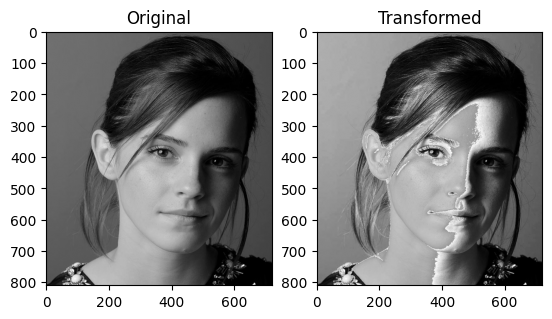

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\emma.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")


# Create lookup table (LUT) for intensity mapping
LUT = np.zeros(256, dtype=np.uint8)

for r in range(256):
    if r < 50:
        s = r
    elif r < 100:
        s = 2 * (r - 50) + 50   # slope 2 between (50,50) and (100,150)
    elif r < 150:
        s = (255 - 150) / (150 - 100) * (r - 100) + 150  # slope 2.1 approx
    else:
        s = (255 - 150) / (255 - 150) * (r - 150) + 150  # slope 1
    
    LUT[r] = np.clip(s, 0, 255)

# Apply transformation using LUT
transformed = cv2.LUT(img, LUT)

# Display results
plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(transformed, cmap="gray"), plt.title("Transformed")
plt.show()


Q2

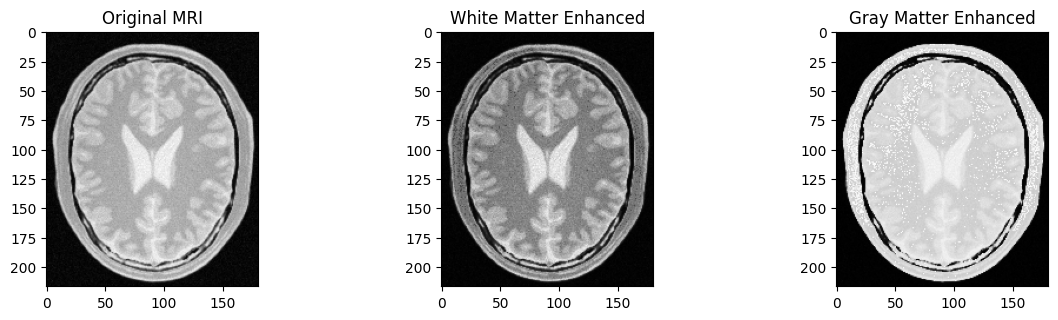

In [ ]:
# Load MRI image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# ----- White matter enhancement -----
LUT_white = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 150:
        s = int(r * 0.5)   # compress dark range
    else:
        s = int((r - 150) * (255-100)/(255-150) + 100)  # stretch bright range
    LUT_white[r] = np.clip(s, 0, 255)

white_enhanced = cv2.LUT(img, LUT_white)

# ----- Gray matter enhancement -----
LUT_gray = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 80:
        s = int(r * 0.3)   # compress low intensities
    elif r < 160:
        s = int((r - 80) * (255-50)/(160-80) + 50)  # stretch mid range
    else:
        s = int((r - 160) * 0.5 + 200)  # compress high intensities
    LUT_gray[r] = np.clip(s, 0, 255)

gray_enhanced = cv2.LUT(img, LUT_gray)

# ----- Plot results -----
plt.figure(figsize=(12,6))

plt.subplot(2,3,1), plt.imshow(img, cmap="gray"), plt.title("Original MRI")
plt.subplot(2,3,2), plt.imshow(white_enhanced, cmap="gray"), plt.title("White Matter Enhanced")
plt.subplot(2,3,3), plt.imshow(gray_enhanced, cmap="gray"), plt.title("Gray Matter Enhanced")


plt.tight_layout()
plt.show()


Q3


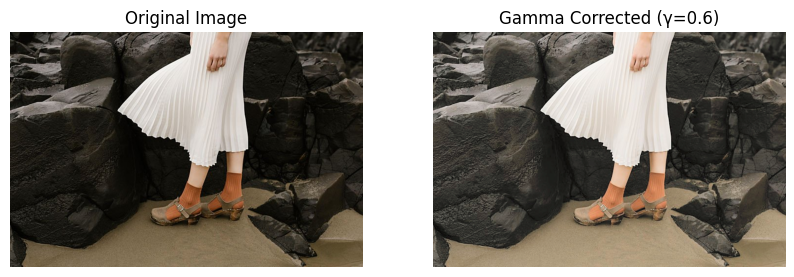

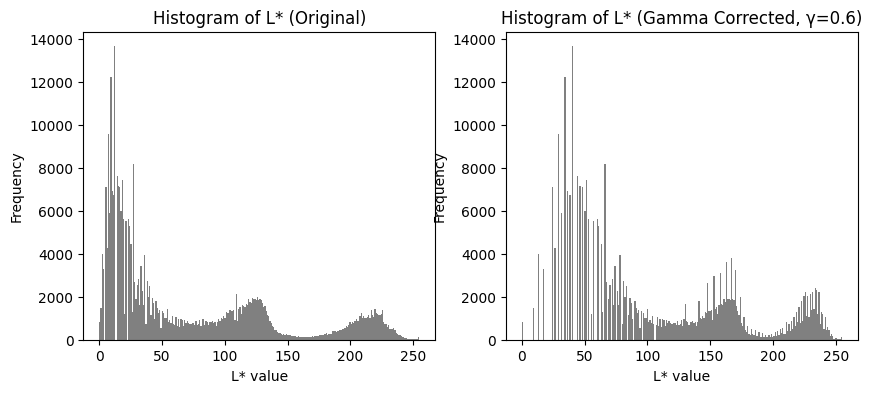

In [5]:

# Load the image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\highlights_and_shadows.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB for display

# Convert RGB → Lab
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab)

# Normalize L (0–100 range for Lab, OpenCV stores L in 0–255)
L_norm = L / 255.0

# Apply gamma correction
gamma = 0.6   # <--- state your gamma value
L_corr = np.clip((L_norm ** gamma) * 255.0, 0, 255).astype(np.uint8)

# Merge back corrected L with a and b
lab_corr = cv2.merge([L_corr, a, b])

# Convert back to RGB
img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_LAB2RGB)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_corr)
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.show()

# ---------- Histograms of L ----------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(L.flatten(), bins=256, range=(0,255), color='gray')
plt.title("Histogram of L* (Original)")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(L_corr.flatten(), bins=256, range=(0,255), color='gray')
plt.title(f"Histogram of L* (Gamma Corrected, γ={gamma})")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.show()
